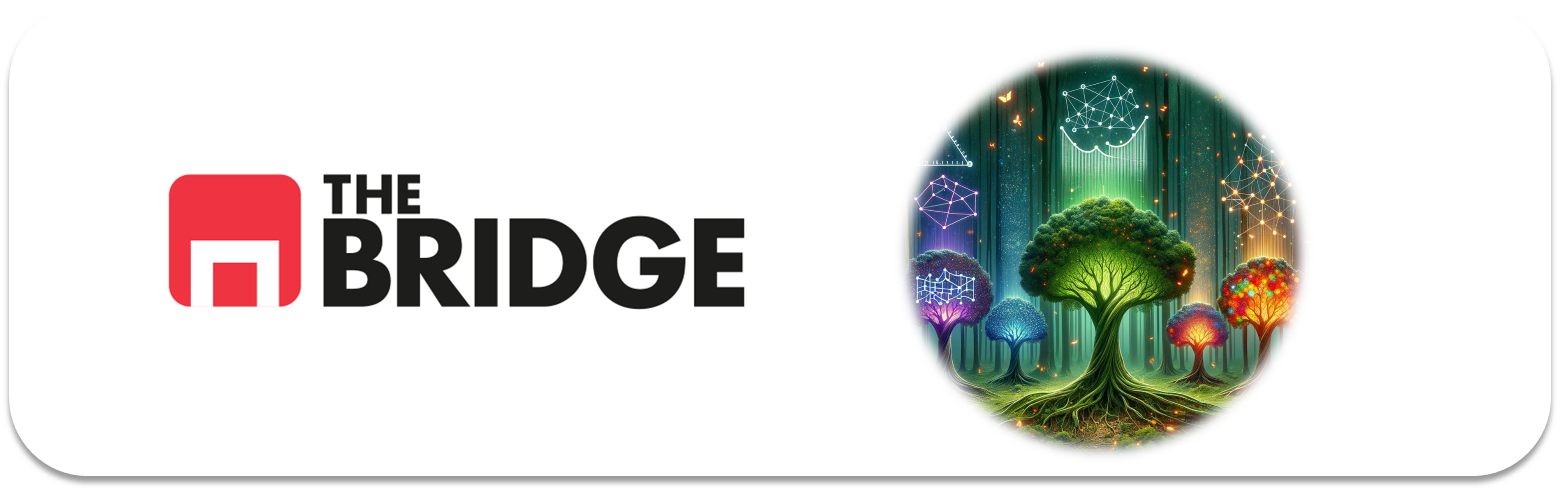

## PRACTICA OBLIGATORIA: **Arboles de Decisión y Ajuste de hiperparámetros**

* La práctica obligatoria de esta unidad consiste en encontrar el mejor modelo para resolver un problema de predicción de si los destinatarios de una campaña de marketing adquirirán un producto concreto. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [418]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import bootcampviztools as bt
df = pd.read_csv('./data/bank-full.csv', delimiter=';')

### Descripción

En el directorio data encontrarás un dataset que contiene datos relacionados con campañas de marketing directo de una institución bancaria portuguesa (es el dataset "Bank Marketing" de la UCI Machine Learning Repository). Los datos se recopilaron de campañas de marketing telefónico, donde el objetivo principal era predecir si el cliente se suscribiría a un depósito a plazo.

La práctica consiste en completar el proceso de creación de un modelo basado en árboles de decisión que permita predecir si un cliente (dadas unas características similares a las del dataset) "comprará" el depósito a plazo. Sigue los pasos necesarios de un proceso de ML para crear el modelo, optimizar sus hiperparámetros, comparar los resultados de esa optimización con una regresión logística (sin optimizar, con sus hiperparámetros por defecto) y finalmente evaluarlo contra test y hacer una pequeña valoración del resultado obtenido.

Tendrás que hacer la limpieza, split, minieda, selección, tratamiento, primeros entrenamientos, optimización, comparación y evaluación según tu mejor criterio. Eso sí, es obligatorio:
- Identificar el target y analizar su distribución
- Realizar una optimización de hiperparámetros, escogiendo un grid medianemante razonado
- Comparar con el modelo baseline
- Evaluar contra test

AYUDA: La dirección del banco nos proporciona estas notas (en inglés):

 
   **bank client data:**  
   1 - age (numeric)  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)  
   4 - education (categorical: "unknown","secondary","primary","tertiary")  
   5 - default: has credit in default? (binary: "yes","no")  
   6 - balance: average yearly balance, in euros (numeric)   
   7 - housing: has housing loan? (binary: "yes","no")  
   8 - loan: has personal loan? (binary: "yes","no")   

   **related with the last contact of the current campaign:**  
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")   
  10 - day: last contact day of the month (numeric)  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  12 - duration: last contact duration, in seconds (numeric)    

   **other attributes:**  
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  

In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [420]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [421]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Aplicar LabelEncoder a la columna 'cut'
df['y'] = label_encoder.fit_transform(df['y'])

# Mostrar el DataFrame con la nueva columna
print(df[['y']].value_counts())

y
0    39922
1     5289
Name: count, dtype: int64


In [422]:
# Suponiendo que tienes el dataframe df
# Primero dividimos el dataframe en train y test
features = df.drop('y', axis=1)  # Variables independientes
target= df['y']  # Variable target

In [423]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [424]:
# Lo primero en las clasificaciones -> miramos la distribución del target
y_train.value_counts(normalize=True)

y
0    0.883931
1    0.116069
Name: proportion, dtype: float64

In [425]:
X_train.balance.describe()

count     36168.000000
mean       1361.046146
std        3023.083187
min       -8019.000000
25%          70.000000
50%         447.000000
75%        1429.000000
max      102127.000000
Name: balance, dtype: float64

In [426]:
X_train["pdays"] = X_train["pdays"].replace(-1, 0)
X_test["pdays"] = X_test["pdays"].replace(-1, 0)

In [427]:
# Análisis visual numéricas
features_num = ["age","balance","day","duration","campaign","pdays","previous"]

In [428]:
# # Combina X_train (con las características) y y_train (target) en un solo DataFrame
# df_train = X_train[features_num].copy()
# df_train['target'] = y_train  # Asigna la variable objetivo como columna 'target'

# # Realiza el pairplot usando seaborn
# sns.pairplot(df_train, hue='target')

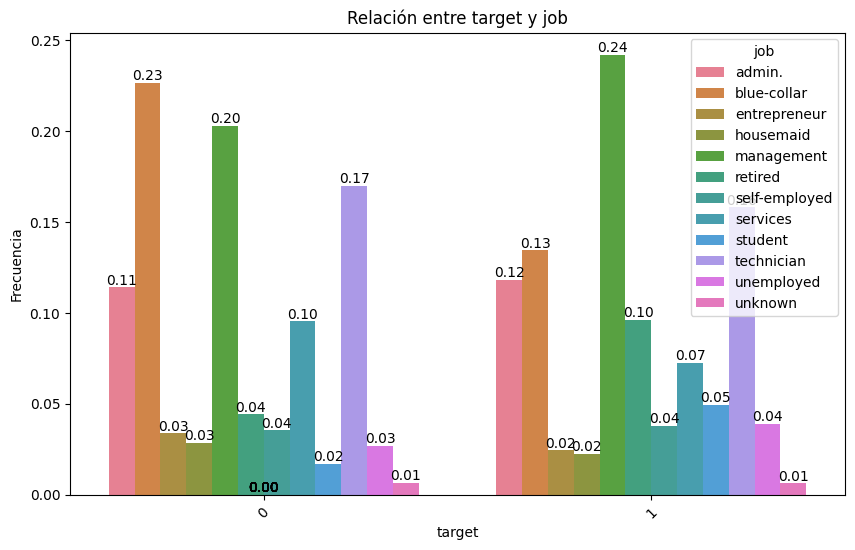

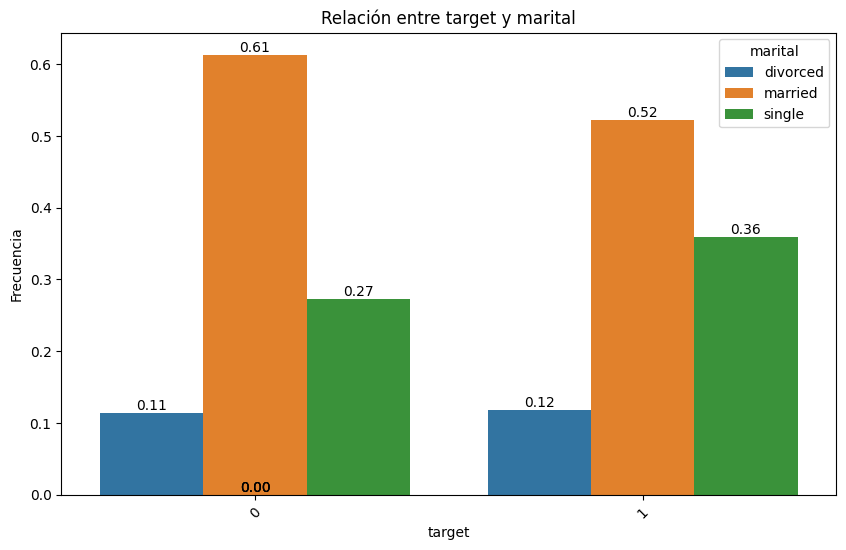

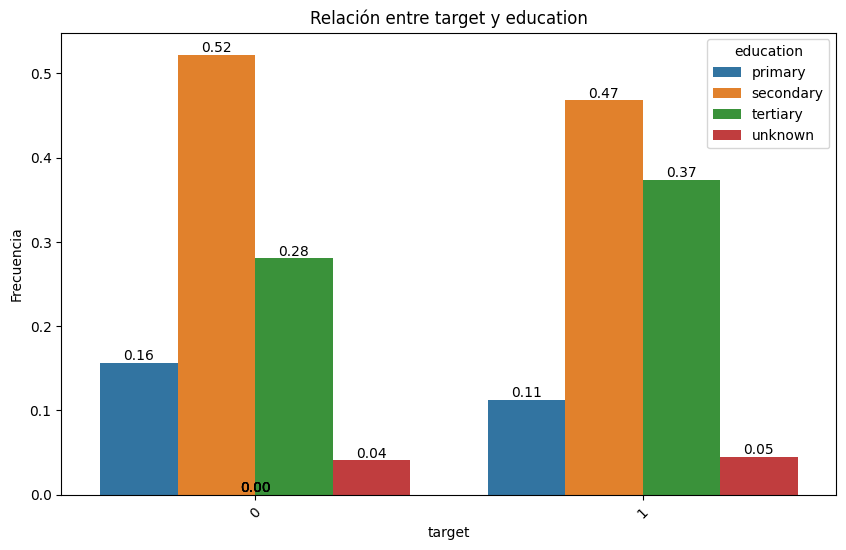

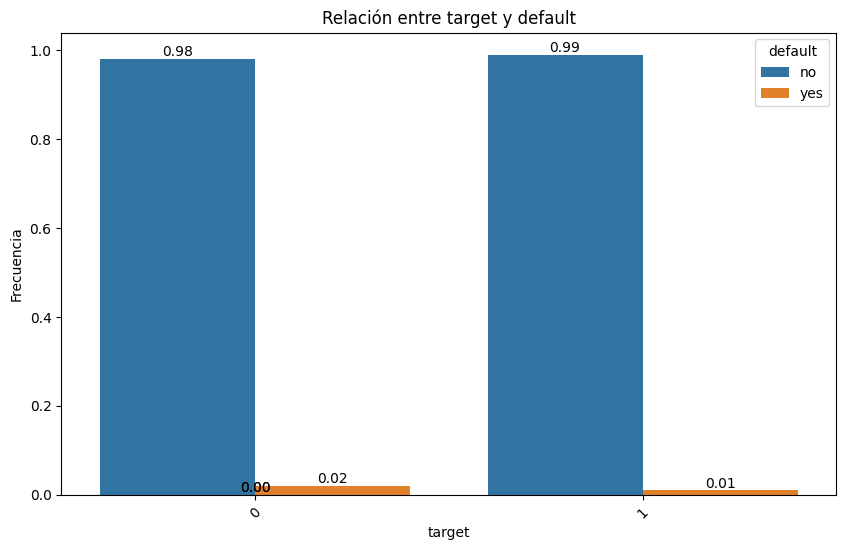

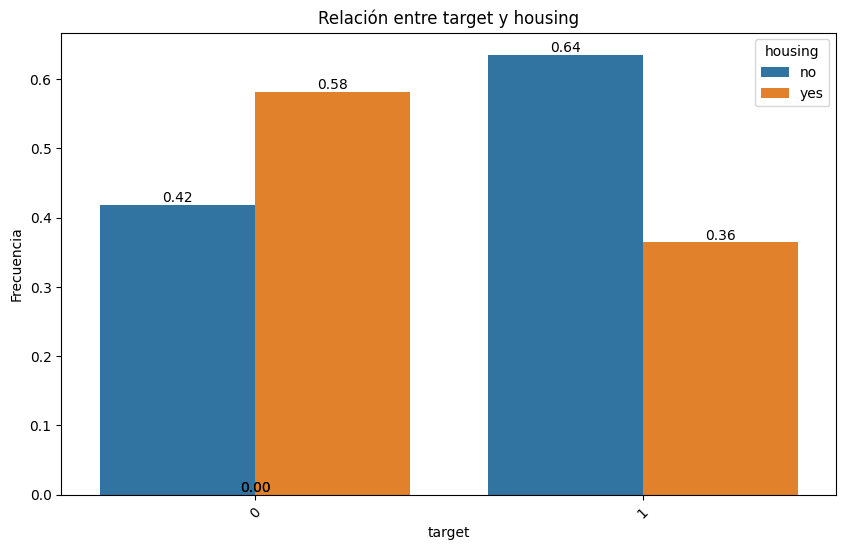

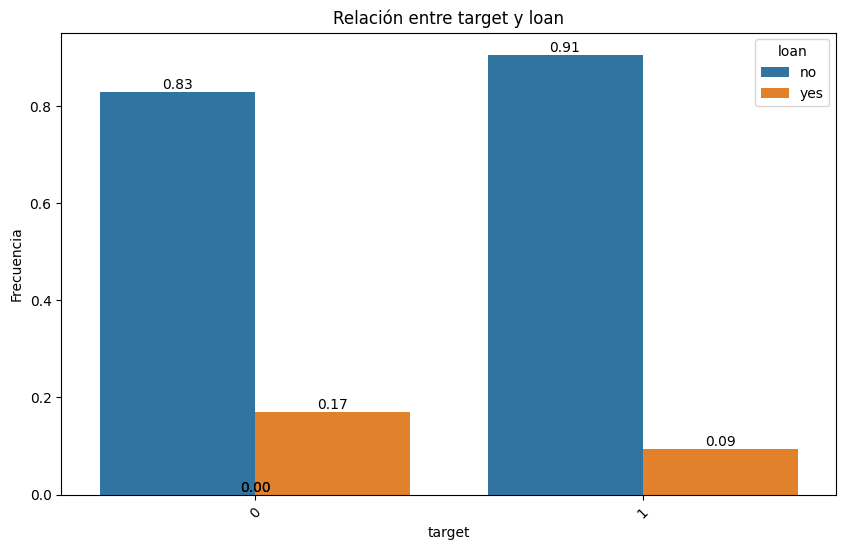

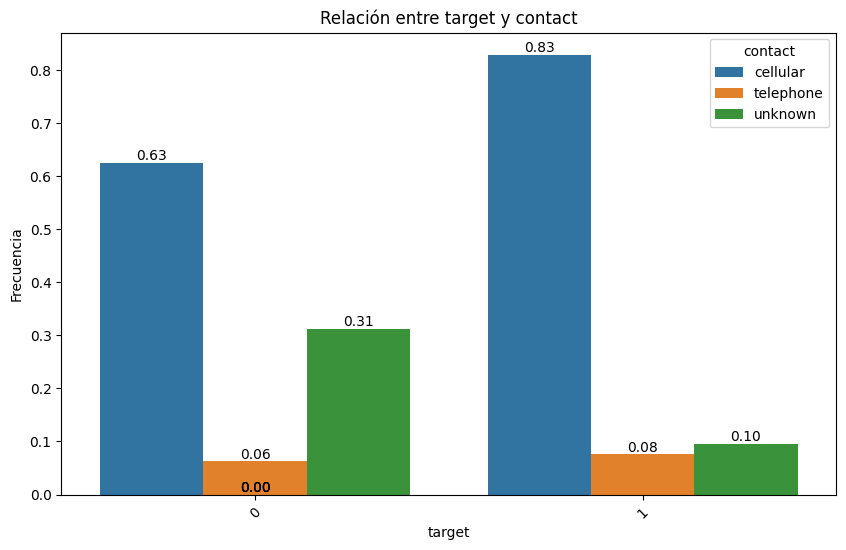

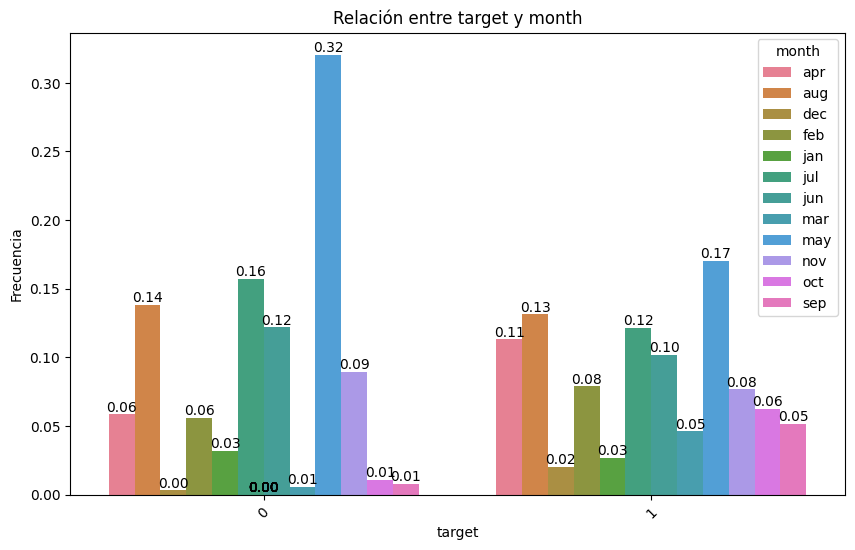

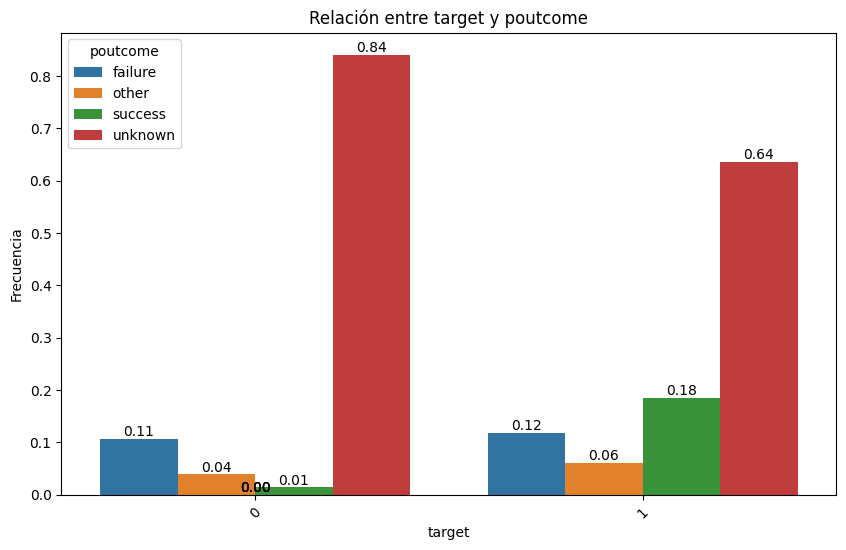

In [429]:
# Análisis visual categóricas
features_cat = ["job","marital","education","default","housing","loan","contact","month","poutcome"]

# Combina X_train (con las características) y y_train (target) en un solo DataFrame
df_train = X_train[features_cat].copy()
df_train['target'] = y_train  # Asigna la variable objetivo como columna 'target'

df_train
for feat in features_cat:
    bt.plot_categorical_relationship_fin(df_train, "target", feat, show_values= True, relative_freq= True)

In [430]:
features_cat = ["job","marital","education","housing","loan","contact","month","poutcome"]
features_num = ["age","balance","day","duration","campaign","pdays"]

X_train = X_train.drop(columns=['default','previous'],axis=1) 
X_test = X_test.drop(columns=['default','previous'],axis=1) 

In [431]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36168 entries, 3344 to 15795
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        36168 non-null  int64 
 1   job        36168 non-null  object
 2   marital    36168 non-null  object
 3   education  36168 non-null  object
 4   balance    36168 non-null  int64 
 5   housing    36168 non-null  object
 6   loan       36168 non-null  object
 7   contact    36168 non-null  object
 8   day        36168 non-null  int64 
 9   month      36168 non-null  object
 10  duration   36168 non-null  int64 
 11  campaign   36168 non-null  int64 
 12  pdays      36168 non-null  int64 
 13  poutcome   36168 non-null  object
dtypes: int64(6), object(8)
memory usage: 4.1+ MB


In [432]:
# Separar las columnas numéricas y categóricas
X_train_num = X_train[features_num]  # Solo las numéricas
X_train_cat = X_train[features_cat]  # Solo las categóricas

# Aplicar One-Hot Encoding solo a las variables categóricas
X_train = pd.get_dummies(X_train_cat, drop_first=True)

# Concatenar las columnas numéricas con las categóricas codificadas
X_train = pd.concat([X_train_num, X_train], axis=1)

# Ver el resultado
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36168 entries, 3344 to 15795
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  36168 non-null  int64
 1   balance              36168 non-null  int64
 2   day                  36168 non-null  int64
 3   duration             36168 non-null  int64
 4   campaign             36168 non-null  int64
 5   pdays                36168 non-null  int64
 6   job_blue-collar      36168 non-null  bool 
 7   job_entrepreneur     36168 non-null  bool 
 8   job_housemaid        36168 non-null  bool 
 9   job_management       36168 non-null  bool 
 10  job_retired          36168 non-null  bool 
 11  job_self-employed    36168 non-null  bool 
 12  job_services         36168 non-null  bool 
 13  job_student          36168 non-null  bool 
 14  job_technician       36168 non-null  bool 
 15  job_unemployed       36168 non-null  bool 
 16  job_unknown          361

In [433]:
# Separar las columnas numéricas y categóricas
X_test_num = X_test[features_num]  # Solo las numéricas
X_test_cat = X_test[features_cat]  # Solo las categóricas

# Aplicar One-Hot Encoding solo a las variables categóricas
X_test = pd.get_dummies(X_test_cat, drop_first=True)

# Concatenar las columnas numéricas con las categóricas codificadas
X_test = pd.concat([X_test_num, X_test], axis=1)

# Ver el resultado
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9043 entries, 3776 to 11677
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  9043 non-null   int64
 1   balance              9043 non-null   int64
 2   day                  9043 non-null   int64
 3   duration             9043 non-null   int64
 4   campaign             9043 non-null   int64
 5   pdays                9043 non-null   int64
 6   job_blue-collar      9043 non-null   bool 
 7   job_entrepreneur     9043 non-null   bool 
 8   job_housemaid        9043 non-null   bool 
 9   job_management       9043 non-null   bool 
 10  job_retired          9043 non-null   bool 
 11  job_self-employed    9043 non-null   bool 
 12  job_services         9043 non-null   bool 
 13  job_student          9043 non-null   bool 
 14  job_technician       9043 non-null   bool 
 15  job_unemployed       9043 non-null   bool 
 16  job_unknown          9043

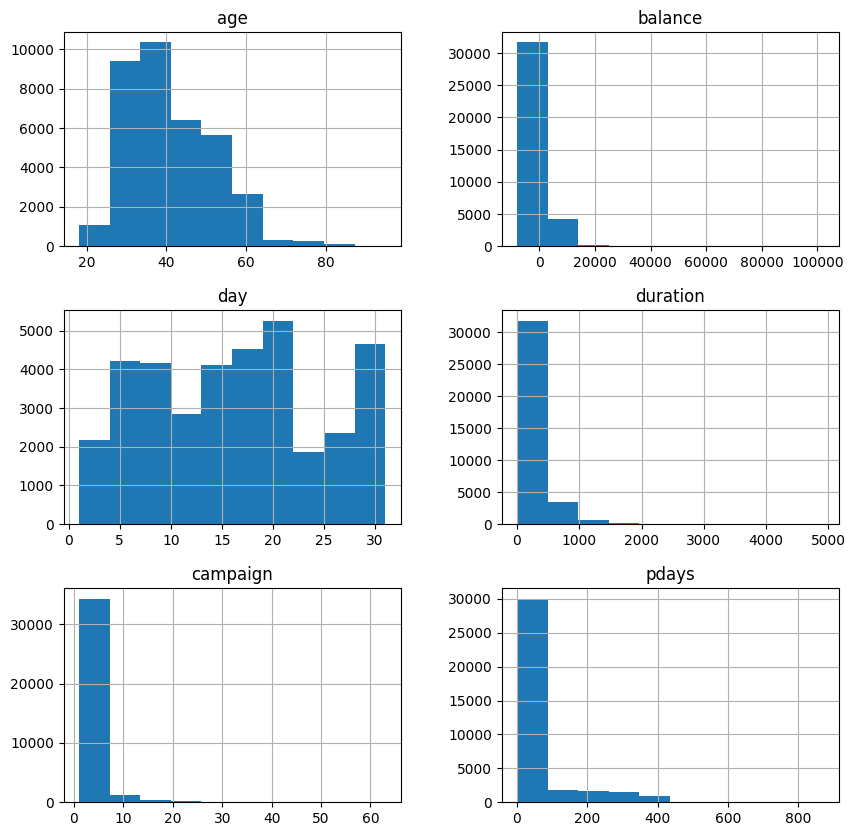

In [434]:
X_train[features_num].hist(figsize=(10, 10));

c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

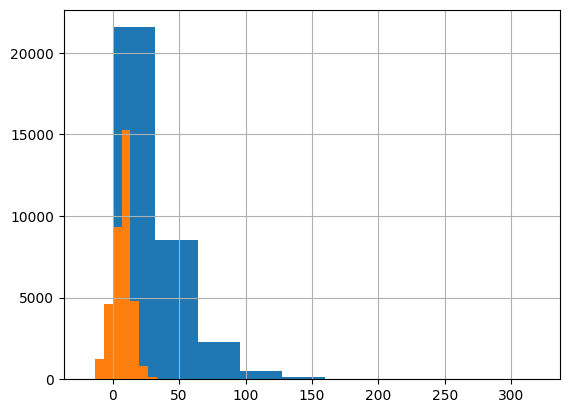

In [435]:
np.sqrt(X_train["balance"]).hist() # Azul
np.cbrt(X_train["balance"]).hist() # Naranja
#np.log(X_train["balance"]+1).hist() # Verde

<Axes: >

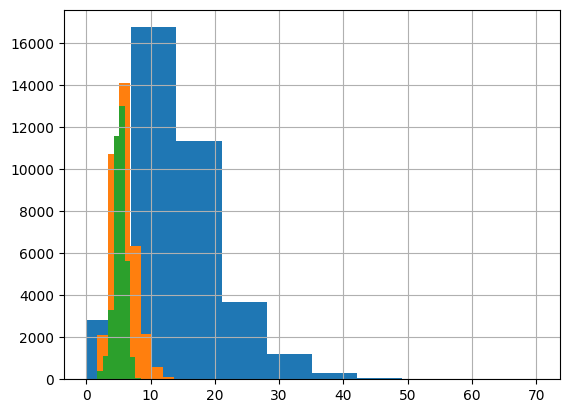

In [436]:
np.sqrt(X_train["duration"]).hist() # Azul
np.cbrt(X_train["duration"]).hist() # Naranja
np.log(X_train["duration"]+1).hist() # Verde

<Axes: >

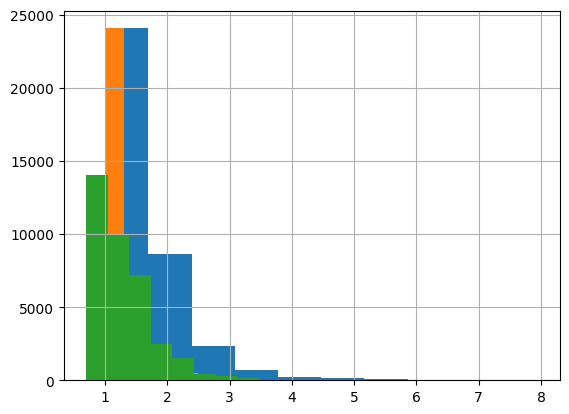

In [437]:
np.sqrt(X_train["campaign"]).hist() # Azul
np.cbrt(X_train["campaign"]).hist() # Naranja
np.log(X_train["campaign"]+1).hist() # Verde

<Axes: >

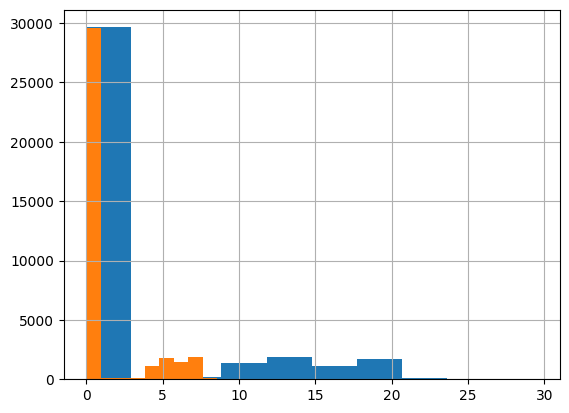

In [438]:
np.sqrt(X_train["pdays"]).hist() # Azul
np.cbrt(X_train["pdays"]).hist() # Naranja
#np.log(X_train["pdays"]+1).hist() # Verde

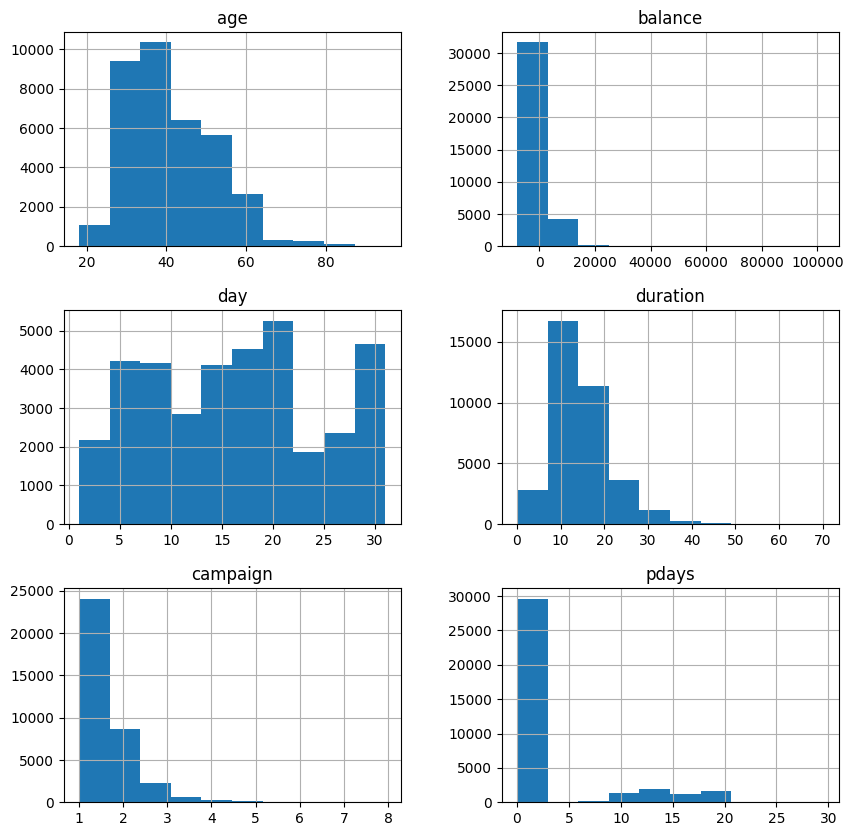

In [439]:
# Aplicaremos raíz cuadrada a train y test
# X_train["balance"] = np.sqrt(X_train["balance"])
# X_test["balance"] = np.sqrt(X_test["balance"])
X_train["duration"] = np.sqrt(X_train["duration"])
X_test["duration"] = np.sqrt(X_test["duration"])
X_train["pdays"] = np.sqrt(X_train["pdays"])
X_test["pdays"] = np.sqrt(X_test["pdays"])
X_train["campaign"] = np.sqrt(X_train["campaign"])
X_test["campaign"] = np.sqrt(X_test["campaign"])
X_train.hist(figsize=(10, 10));

In [440]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36168 entries, 3344 to 15795
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  36168 non-null  int64  
 1   balance              36168 non-null  int64  
 2   day                  36168 non-null  int64  
 3   duration             36168 non-null  float64
 4   campaign             36168 non-null  float64
 5   pdays                36168 non-null  float64
 6   job_blue-collar      36168 non-null  bool   
 7   job_entrepreneur     36168 non-null  bool   
 8   job_housemaid        36168 non-null  bool   
 9   job_management       36168 non-null  bool   
 10  job_retired          36168 non-null  bool   
 11  job_self-employed    36168 non-null  bool   
 12  job_services         36168 non-null  bool   
 13  job_student          36168 non-null  bool   
 14  job_technician       36168 non-null  bool   
 15  job_unemployed       36168 non-null  b

In [441]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[features_num] = scaler.fit_transform(X_train[features_num])

In [442]:
X_test[features_num] = scaler.fit_transform(X_test[features_num])

In [443]:
X_train[features_num].describe()

,age,balance,day,duration,campaign,pdays
count,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04,3.616800e+04
mean,-3.125618e-16,2.828969e-17,-5.599001e-18,7.897539e-17,-6.137782e-16,1.159092e-17
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-2.159573e+00,-3.102851e+00,-1.779749e+00,-2.206146e+00,-8.018587e-01,-4.514066e-01
25%,-7.469068e-01,-4.270686e-01,-9.389838e-01,-6.723945e-01,-8.018587e-01,-4.514066e-01
50%,-1.818405e-01,-3.023598e-01,2.189120e-02,-1.785910e-01,-1.721141e-01,-4.514066e-01
75%,6.657590e-01,2.247864e-02,6.224381e-01,4.887993e-01,3.111059e-01,-4.514066e-01
max,5.092112e+00,3.333264e+01,1.823532e+00,8.392019e+00,9.745111e+00,4.605711e+00


In [444]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [445]:
y_pred_base = tree_clf.predict(X_test)

In [446]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Reporte de clasificación
class_report = classification_report(y_test, y_pred_base)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7952
           1       0.48      0.48      0.48      1091

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.87      0.87      0.87      9043



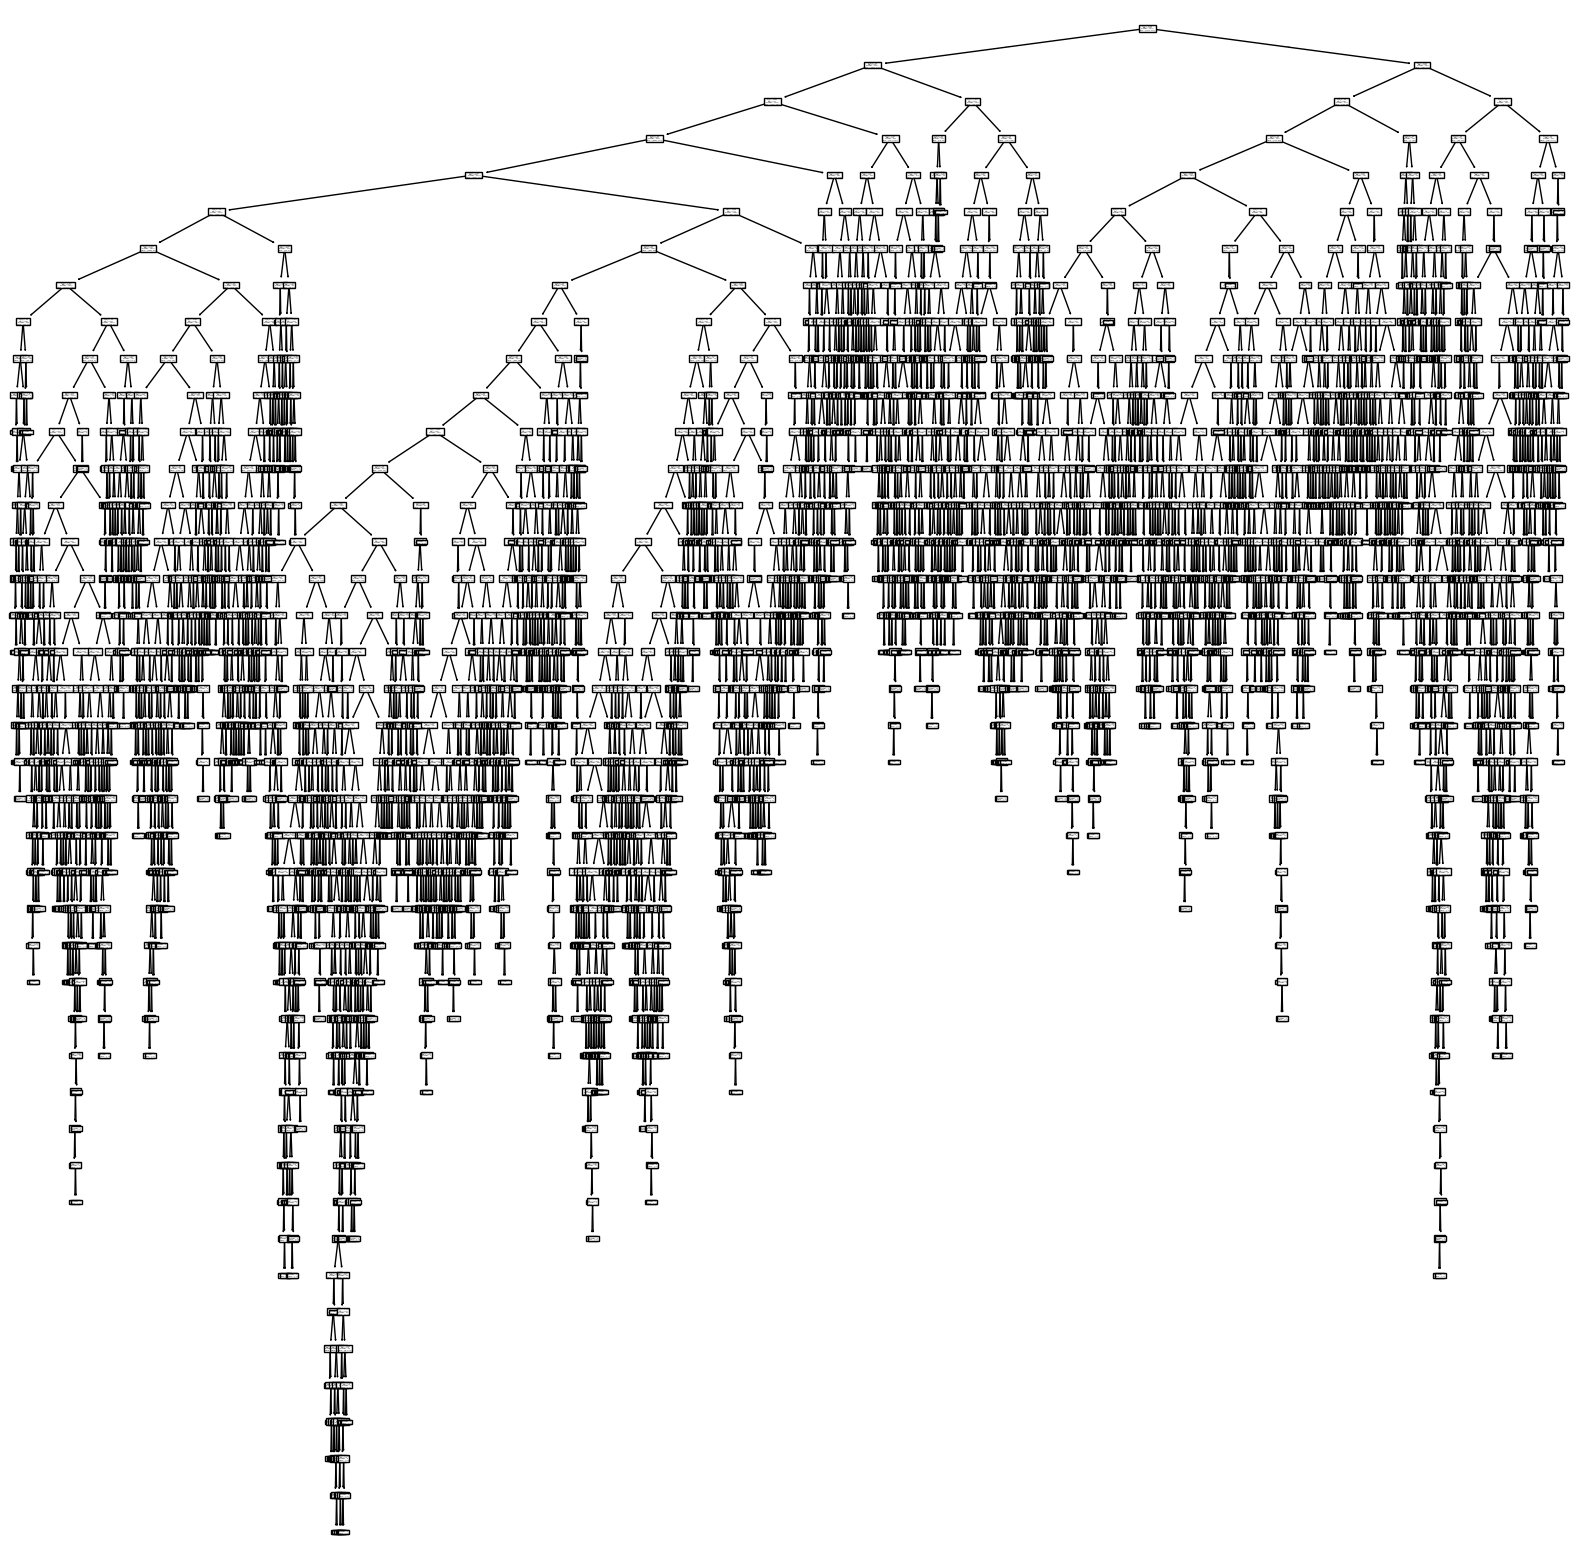

In [447]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(tree_clf);

In [448]:
from sklearn.model_selection import GridSearchCV

# Definir los valores para los hiperparámetros
param_grid = {
    'max_depth': [30, 50, 100, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4, 6],
    'criterion': ['gini', 'entropy']
}

# Crear un modelo base de árbol de decisión
tree = DecisionTreeClassifier(random_state=42)

# Configurar el GridSearchCV
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Ajustar el GridSearchCV al conjunto de entrenamiento
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [30, 50, 100, None],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

In [449]:
# Mejor combinación de hiperparámetros
print("Best parameters found: ", grid_search.best_params_)

# Mejor puntuación obtenida durante la validación cruzada
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 6, 'min_samples_split': 2}
Best cross-validation score:  0.8874697119968339


In [450]:
# Predecir usando el mejor modelo encontrado
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)

# Evaluar el rendimiento del modelo optimizado
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)

print(f"Optimized Model Accuracy: {accuracy_optimized}")

class_report = classification_report(y_test, y_pred_optimized)
print("Classification Report:")
print(class_report)

Optimized Model Accuracy: 0.8888643149397324
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7952
           1       0.55      0.45      0.50      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.70      0.72      9043
weighted avg       0.88      0.89      0.88      9043



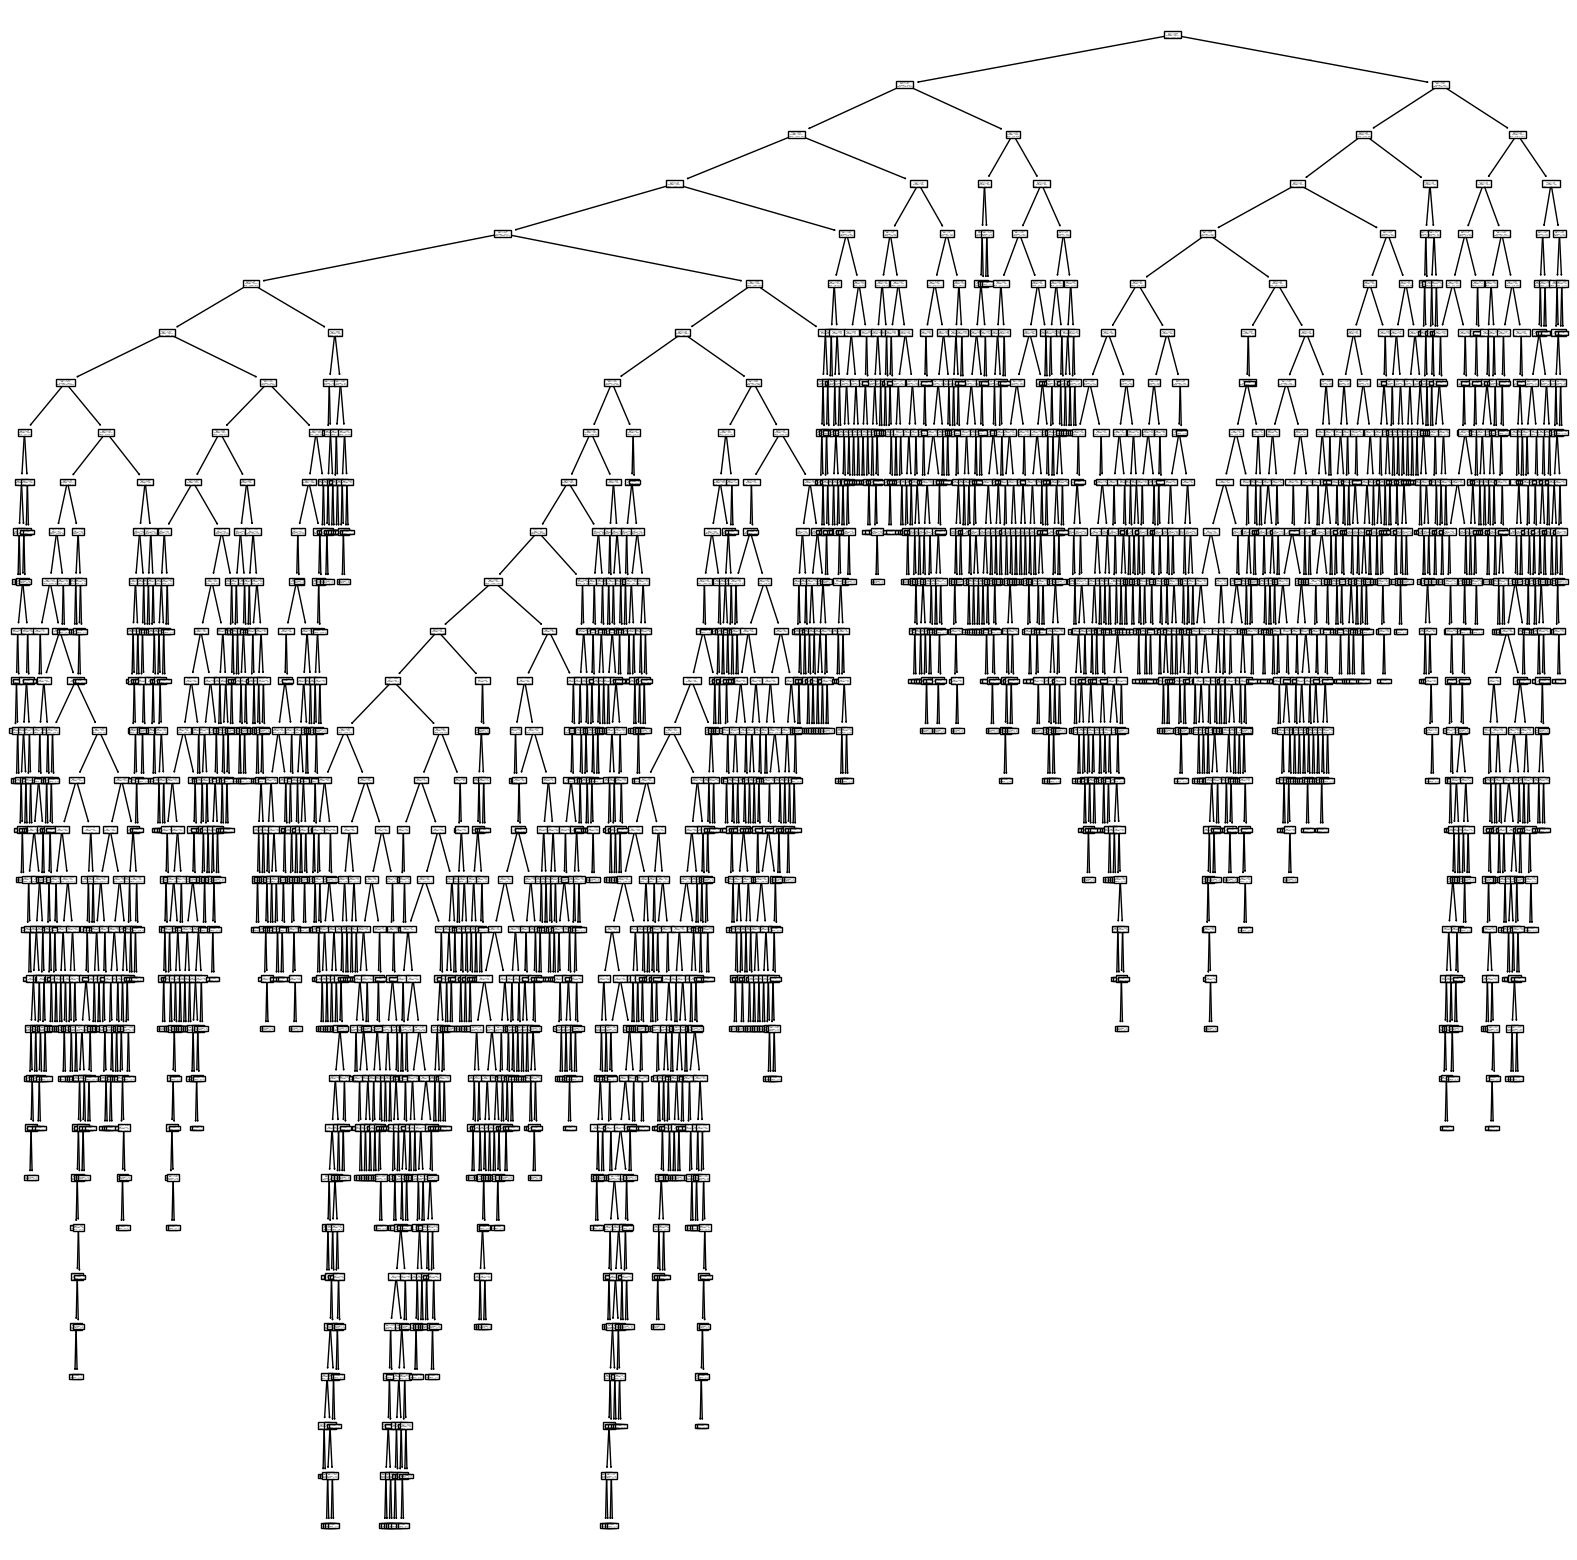

In [451]:
plt.figure(figsize=(20,20))
plot_tree(best_model);

In [452]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9043 entries, 3776 to 11677
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9043 non-null   float64
 1   balance              9043 non-null   float64
 2   day                  9043 non-null   float64
 3   duration             9043 non-null   float64
 4   campaign             9043 non-null   float64
 5   pdays                9043 non-null   float64
 6   job_blue-collar      9043 non-null   bool   
 7   job_entrepreneur     9043 non-null   bool   
 8   job_housemaid        9043 non-null   bool   
 9   job_management       9043 non-null   bool   
 10  job_retired          9043 non-null   bool   
 11  job_self-employed    9043 non-null   bool   
 12  job_services         9043 non-null   bool   
 13  job_student          9043 non-null   bool   
 14  job_technician       9043 non-null   bool   
 15  job_unemployed       9043 non-null   bo

In [453]:
from sklearn.linear_model import LogisticRegression

# Instanciar la regresión logística con max_iter=10000
log_reg = LogisticRegression(random_state=42)

# Entrenar la regresión logística
log_reg.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [454]:
from sklearn.metrics import classification_report

# Hacer predicciones para el conjunto de prueba con ambos modelos
y_pred_log_reg = log_reg.predict(X_test)

# Comparar los resultados con classification_report
print("Classification Report - Regresión Logística:")
print(classification_report(y_test, y_pred_log_reg))

print("Classification Report - Árbol de Decisión:")
print(classification_report(y_test, y_pred_optimized))


Classification Report - Regresión Logística:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7952
           1       0.66      0.36      0.47      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.67      0.71      9043
weighted avg       0.89      0.90      0.89      9043

Classification Report - Árbol de Decisión:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7952
           1       0.55      0.45      0.50      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.70      0.72      9043
weighted avg       0.88      0.89      0.88      9043

